In [1]:
import pandas as pd
import numpy as np
import Dora 
import time
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("winequality-red.csv", sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
for dtype in ['float','int','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 0.01 MB
Average memory usage for int columns: 0.01 MB
Average memory usage for object columns: 0.00 MB


In [6]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.3f} MB".format(usage_mb)

In [7]:
df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')
print("Before: ", mem_usage(df_int))
print("After: ", mem_usage(converted_int))
compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

Before:  0.012 MB
After:  0.002 MB


,before,after
uint8,NaN,1.0
int64,1.0,NaN


In [8]:
df_float = df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')
print("Before: ", mem_usage(df_float))
print("After: ", mem_usage(converted_float))
compare_floats = pd.concat([df_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

Before:  0.134 MB
After:  0.067 MB


,before,after
float32,NaN,11.0
float64,11.0,NaN


In [9]:
optimized_df = df.copy()
optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float
print(mem_usage(df))
print(mem_usage(optimized_df))

0.147 MB
0.069 MB


In [12]:
optimized_df.to_csv('optimized_df.csv')

In [10]:
def measure_time(df, label):
    start = time.time()
    _ = df.describe()   
    end = time.time()
    return end - start

Time before optimization: 0.0164 sec
Time after optimization:  0.0149 sec


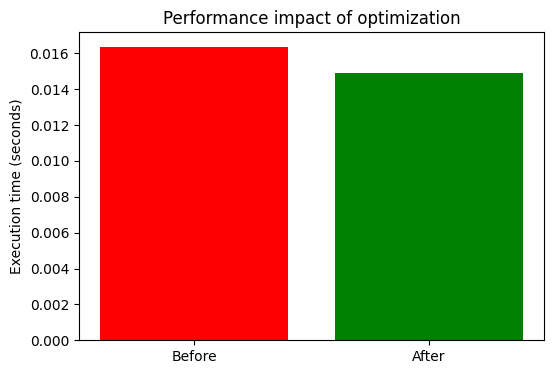

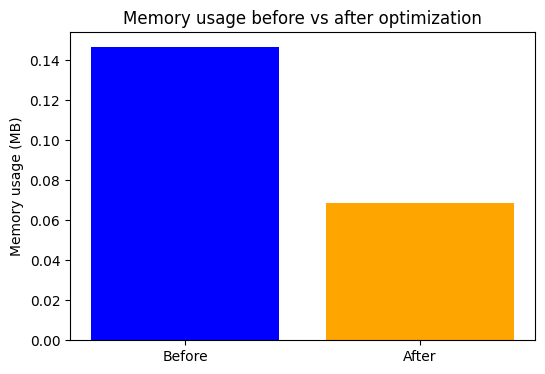

In [11]:
# заміри
time_before = measure_time(df, "before")
time_after = measure_time(optimized_df, "after")

# вивід
print(f"Time before optimization: {time_before:.4f} sec")
print(f"Time after optimization:  {time_after:.4f} sec")

# побудова графіку
plt.figure(figsize=(6,4))
plt.bar(["Before", "After"], [time_before, time_after], color=["red","green"])
plt.ylabel("Execution time (seconds)")
plt.title("Performance impact of optimization")
plt.show()

# другий графік для пам'яті
mem_before = df.memory_usage(deep=True).sum() / 1024**2
mem_after = optimized_df.memory_usage(deep=True).sum() / 1024**2

plt.figure(figsize=(6,4))
plt.bar(["Before", "After"], [mem_before, mem_after], color=["blue","orange"])
plt.ylabel("Memory usage (MB)")
plt.title("Memory usage before vs after optimization")
plt.show()